In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [19]:
# Read the cleaned dataset into a pandas dataframe
df = pd.read_csv('Hadoop_Heroes_Cleaned_Dataset.csv')
df

,Student Population,AP Participation,AP Math Participation,Teacher Qualification,Student-Teacher Ratio,Whites,Blacks,Two or More Races,Native Americans,Asians,...,85719,85730,85737,85743,85745,85747,85748,85750,85756,Arizona School Score
0,1000,10,8,80,20,60,20,5,3,5,...,0,0,0,0,0,0,0,0,0,5
1,100,2,1,80,10,50,40,5,3,2,...,0,0,0,0,0,0,0,0,0,6
2,600,5,4,85,18,70,10,5,2,8,...,0,0,0,0,0,0,0,0,0,4
3,800,7,6,88,21,65,12,4,3,8,...,0,0,0,0,0,0,0,0,0,6
4,400,5,4,80,17,50,30,10,5,8,...,0,0,0,0,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,1144,3,15,99,20,45,20,7,4,15,...,0,0,0,0,0,1,0,0,0,6
309,152,8,1,91,35,65,7,6,0,4,...,0,0,0,0,0,0,1,0,0,5
310,59,5,14,93,8,70,5,3,2,20,...,0,0,0,0,0,0,1,0,0,6
311,1739,22,8,98,23,55,15,7,4,15,...,0,0,0,0,0,0,0,1,0,1


In [20]:
# Create 'Target' column based on Arizona School Score
df['Target'] = df['Arizona School Score'].apply(lambda x: 'High' if x > 5 else 'Low')
df

,Student Population,AP Participation,AP Math Participation,Teacher Qualification,Student-Teacher Ratio,Whites,Blacks,Two or More Races,Native Americans,Asians,...,85730,85737,85743,85745,85747,85748,85750,85756,Arizona School Score,Target
0,1000,10,8,80,20,60,20,5,3,5,...,0,0,0,0,0,0,0,0,5,Low
1,100,2,1,80,10,50,40,5,3,2,...,0,0,0,0,0,0,0,0,6,High
2,600,5,4,85,18,70,10,5,2,8,...,0,0,0,0,0,0,0,0,4,Low
3,800,7,6,88,21,65,12,4,3,8,...,0,0,0,0,0,0,0,0,6,High
4,400,5,4,80,17,50,30,10,5,8,...,0,0,0,0,0,0,0,0,6,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,1144,3,15,99,20,45,20,7,4,15,...,0,0,0,0,1,0,0,0,6,High
309,152,8,1,91,35,65,7,6,0,4,...,0,0,0,0,0,1,0,0,5,Low
310,59,5,14,93,8,70,5,3,2,20,...,0,0,0,0,0,1,0,0,6,High
311,1739,22,8,98,23,55,15,7,4,15,...,0,0,0,0,0,0,1,0,1,Low


In [21]:
# Define feature matrix X and target vector y
X = df.drop(['Arizona School Score', 'Target'], axis=1)  # Drop the score and the new target column
y = df['Target']

# Split the dataset into training and testing sets with a 8:2 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
# Initialize the KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Perform 5-fold cross-validation
scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)

In [23]:
# Print the accuracy for each of the 5 folds
print("Accuracy for each fold: ", scores)

# Print the average accuracy across all 5 folds
print("Mean cross-validation accuracy: ", scores.mean())

Accuracy for each fold:  [0.68 0.68 0.56 0.5  0.62]
Mean cross-validation accuracy:  0.608


In [24]:
# Since the GridSearchCV expects integer labels in the target variable for classification tasks, we are going to 
# encode our target variable 'y_train' into binary integer labels before fitting the GridSearchCV object

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable 'y_train' into binary format
y_train_encoded = label_encoder.fit_transform(y_train)

In [25]:
# Define the parameter grid for hyperparamter tuning of the KNN Classifier
param_grid = {
    'n_neighbors': range(1, 30),  # Try different values for k from 1 to 30
    'weights': ['uniform', 'distance'],  # Try both uniform and distance weights
    'metric': ['euclidean', 'manhattan']  # Try different distance metrics
}

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Setup the grid search with 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train_scaled, y_train_encoded)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

# Print the best cross-validation score
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'metric': 'manhattan', 'n_neighbors': 27, 'weights': 'uniform'}
Best cross-validation score: 0.64


Classification Report:
              precision    recall  f1-score   support

        High       0.70      0.87      0.78        46
         Low       0.00      0.00      0.00        17

    accuracy                           0.63        63
   macro avg       0.35      0.43      0.39        63
weighted avg       0.51      0.63      0.57        63



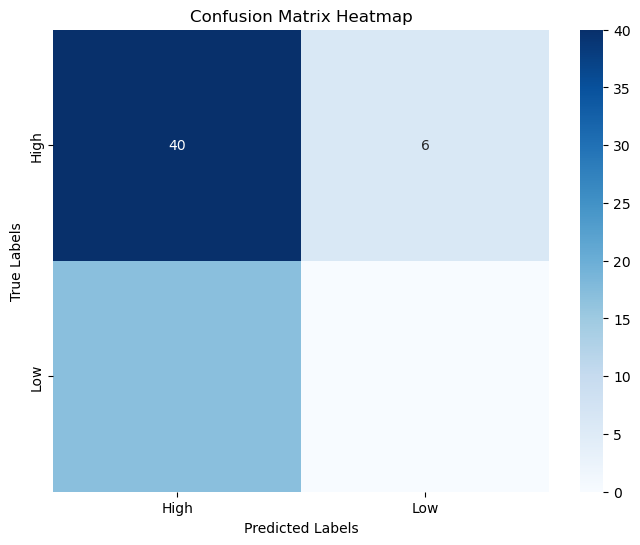

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the best model from grid search
best_knn_model = grid_search.best_estimator_

# Predict the target values for the test set
y_pred = best_knn_model.predict(X_test_scaled)

# Decode the predicted labels
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Generate the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_decoded))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_decoded)

# Plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [27]:
# Count the instances of 'High' and 'Low' in the target variable
target_counts = df['Target'].value_counts()

# Print the counts
print("Count of instances in the Target variable:")
print(target_counts)

Count of instances in the Target variable:
Target
High    204
Low     109
Name: count, dtype: int64


ROC-AUC score: 0.5613810741687979


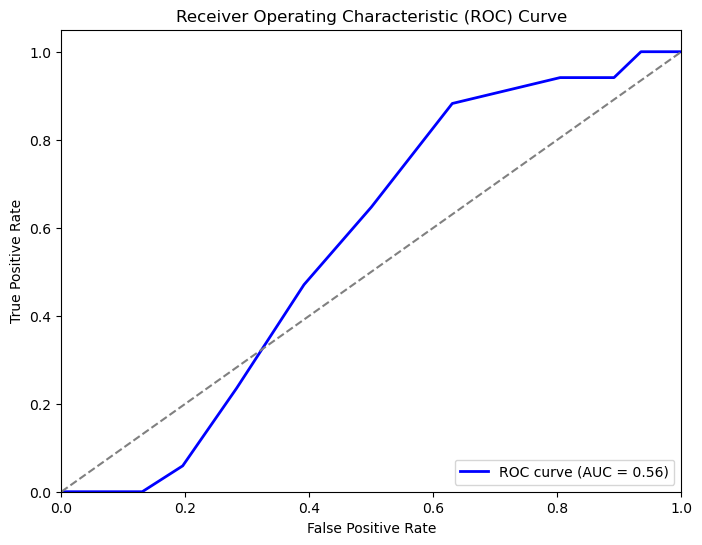

In [31]:
# Plot the ROC Curve and calculate the ROC-AUC value for the KNN Classifier

from sklearn.metrics import roc_curve, roc_auc_score

# Encode the true labels 'y_test' into binary format
y_test_encoded = label_encoder.fit_transform(y_test)

# Calculate the predicted probabilities for the positive class ('High')
y_pred_proba = best_knn_model.predict_proba(X_test_scaled)[:, 1]

# Calculate the false positive rate, true positive rate, and threshold values for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_proba)

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test_encoded, y_pred_proba)

# Print the ROC-AUC score
print("ROC-AUC score:", roc_auc)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()